# Problem Set 2: Classical Dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part A: Diatomic Molecules
### A1: The Lennard-Jones Potential
#### a)

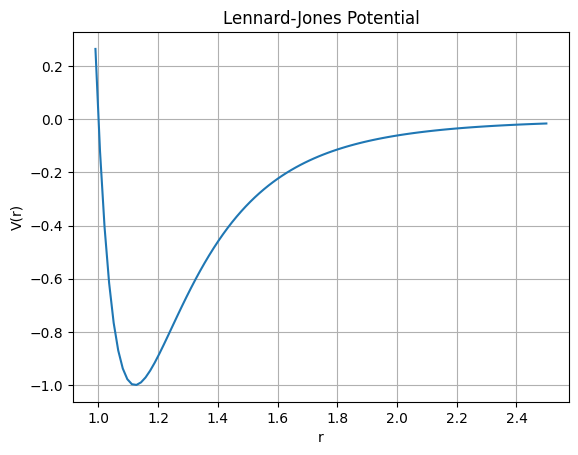

In [26]:
epsilon = 1
sigma = 1

x1 = np.linspace(0.99, 2.5, 100)
def lj_potential(r, epsilon = 1.0, sigma = 1.0):
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

potential = lj_potential(x1)
plt.plot(x1, potential); plt.xlabel('r'); plt.ylabel("V(r)"); plt.title("Lennard-Jones Potential"); plt.grid(); plt.show()

#### b)

![Alt text](Pset02.png)

#### c)

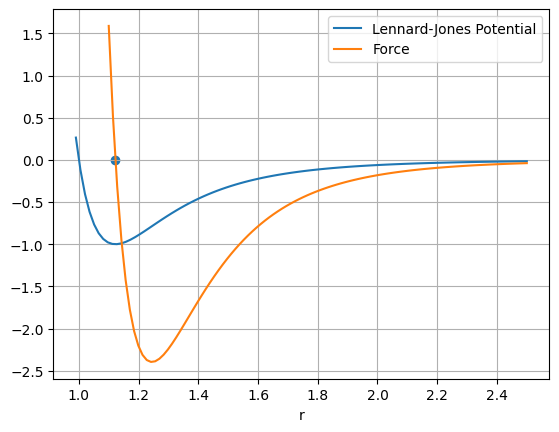

In [27]:
def lj_force(r, epsilon = 1.0, sigma = 1.0):
    return -(24*(((epsilon*(sigma**6))/r**7) - (2*epsilon*(sigma**12))/r**13))

epsilon = 1.0
sigma = 1.0

x2 = np.linspace(1.1, 2.5, 100)
Force = lj_force(x2)

#x1 and potential are from the last question
plt.plot(x1, potential, label="Lennard-Jones Potential") 
plt.plot(x2, Force, label="Force")
plt.scatter(1.1225,0)
plt.xlabel('r');plt.legend();plt.grid();plt.show()

#### d)
The atoms will seperate from one another intially if we start them at r = 1 until they reach the bottom of the well. The sign of the force between them at this point is negative. This is not consistent with my first statement because a negative force will act to bring the atoms closer together.

### A2: Dynamics
#### a)

[[[0.0], [0.0], [0.0]], [[2.0], [0.0], [0.0]]]
[[[0.0, -0.001963671875], [0.0, 0.0], [0.0, 0.0]], [[2.0], [0.0], [0.0]]]


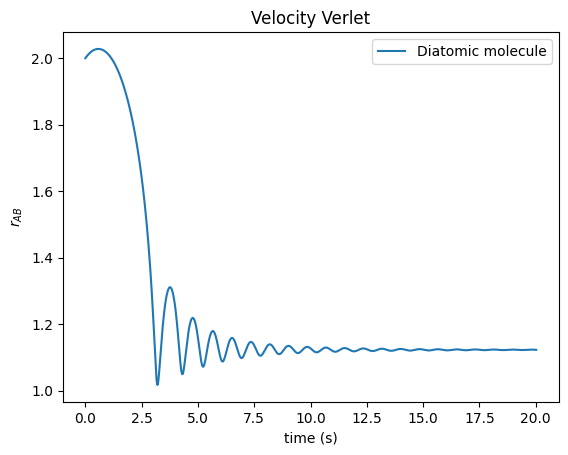

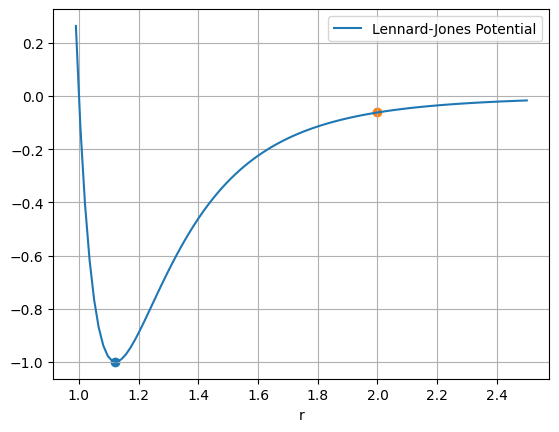

In [165]:
def bond_lengths(particle_index, pos):
    r = [[0 for _ in range(len(pos))] for _ in range(len(pos))]
    for j in range(len(pos)):
        xij = pos[particle_index][0][-1] - pos[j][0][-1]
        yij = pos[particle_index][1][-1] - pos[j][1][-1]
        zij = pos[particle_index][2][-1] - pos[j][2][-1]
        r[particle_index][j] = np.sqrt(xij**2 + yij**2 + zij**2)
    return r    

def lj_3d(particle_index, pos, r, sigma=1.0, epsilon=1.0):
    #the force vector containing all 3D forces acting on a specified particle
    f = [0, 0, 0]
    for i in range(len(pos)):
        if i != particle_index and r[particle_index][i] != 0:
                f[0] += -(pos[particle_index][0][-1] - pos[i][0][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6))
                f[1] += -(pos[particle_index][1][-1] - pos[i][1][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6))
                f[2] += -(pos[particle_index][2][-1] - pos[i][2][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6)) 
    return f

def multiple_atoms_Verlet(pos, vel, h, end_time, m):
    t = [0]
    while t[-1] < end_time:
        for i in range(len(pos)):
            #Compute all of our r_ij b/c we need them for computing F
            r = bond_lengths(i, pos)
            if t[-1] == 0:
                print(pos)
                #print(r)
            f = lj_3d(i, pos, r)
            
            # step 1: calculate
            pos[i][0].append(pos[i][0][-1] + (h*vel[i][0][-1]) + (((h**2)*f[0])/(2*m[i])))#x1(k+1)
            pos[i][1].append(pos[i][1][-1] + (h*vel[i][1][-1]) + (((h**2)*f[1])/(2*m[i])))#y1(k+1)
            pos[i][2].append(pos[i][2][-1] + (h*vel[i][2][-1]) + (((h**2)*f[2])/(2*m[i])))#z1(k+1)

        # step 2: evaluate        
        for i in range(len(pos)):
            # Because we have computed new positions for each particle, we must re-compute our new bond lengths.
            r = bond_lengths(i, pos)
            f_new = lj_3d(i, pos, r)
            # step 3: calculate
            vel[i][0].append(vel[i][0][-1] + ((h/(2*m[i])) * (f[0] + f_new[0])))
            vel[i][1].append(vel[i][1][-1] + ((h/(2*m[i])) * (f[1] + f_new[1])))
            vel[i][2].append(vel[i][2][-1] + ((h/(2*m[i])) * (f[2] + f_new[2])))
        t.append(t[-1] + h)
    return t, pos, vel

# def multiple_atoms_Verlet(pos, vel, h, end_time, m):
A = [[0.0], [0.0], [0.0]] 
B = [[2.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
pos = [A, B]
A_v = [[-0.1], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
vel = [A_v, B_v]
h = 0.02 # homework step size diverges ?
m = [1, 1]
end_time = 20
t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A = np.array(pos[0])
B = np.array(pos[1])
vel = np.array(vel)
r_AB = np.sqrt((A - B)**2)
plt.plot(t, r_AB[0], label="Diatomic molecule");plt.xlabel("time (s)");plt.ylabel("$r_{AB}$");plt.legend();plt.title("Velocity Verlet")
plt.show()

# The second plot is here to confirm that our system is aligning with the potential.
energy_at_end = lj_potential(r_AB[0][-1])
energy_at_start = lj_potential(r_AB[0][0])
plt.scatter(r_AB[0][-1], energy_at_end)
plt.scatter(r_AB[0][0], energy_at_start)
plt.plot(x1, potential, label="Lennard-Jones Potential") 
plt.xlabel('r');plt.legend();plt.grid()
plt.show()

#### b)

The curve is more sharp for the small radius because the sign of the potential's derivative changes more frequently as it converges to the bottom of the well as opposed to the beginning when it is far from the bottom. 

## A3: Conservation of Energy
#### a)

Initial energy of our system: -0.056523437499999996
minimum energy reached at time step 0.02 : -0.867691388911043
-14.678482580278216
-14.666871631073041
1.122438136970544


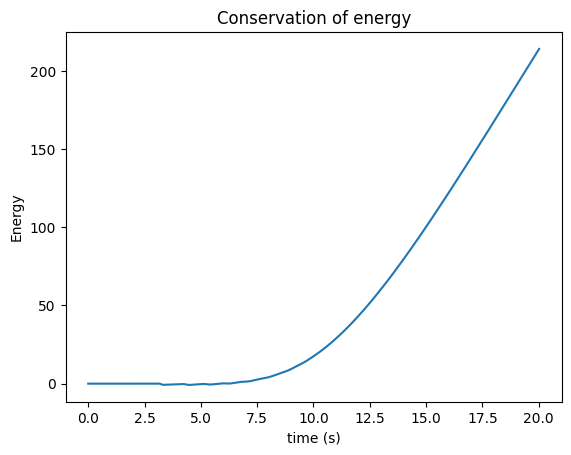

In [158]:
def energy_of_system(t, m, v, r_AB, epsilon = 1.0, sigma = 1.0):
    energy = list()
    for i in range(0, len(t)):
        energy_new = ((1/2)*m[0]*(v[0][0][i]**2)) + ((1/2)*m[1]*(v[1][0][i]**2)) + (4*epsilon*((sigma/r_AB[0][i])**12 - (sigma/r_AB[0][i])**6))
        #energy_new = ((1/2)*m[0]*(v[0][0][i]**2)) - ((1/2)*m[1]*(v[1][0][i]**2)) + (4*epsilon*((sigma/r_AB[0][i])**12 - (sigma/r_AB[0][i])**6))
        if i == 0:
            print("Initial energy of our system:",energy_new)
        energy.append(energy_new)    
    return energy

energy = energy_of_system(t, m, vel, r_AB)
print("minimum energy reached at time step",h,":", min(energy))
print(vel[0][0][-1])
print(vel[1][0][-1])
print(r_AB[0][-1])
plt.plot(t, energy);plt.xlabel("time (s)");plt.ylabel("Energy");plt.title("Conservation of energy");plt.show() 

#### b)

Initial energy of our system: -0.056523437499999996
minimum energy reached at time step 0.01 : -0.907351157878836


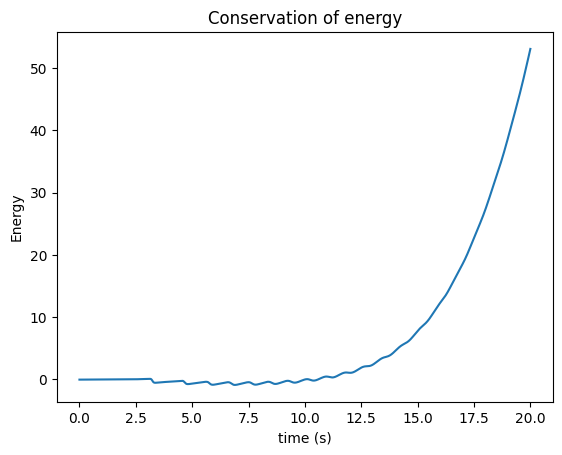

In [132]:
A = [[0.0], [0.0], [0.0]] 
B = [[2.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
pos = [A, B]
A_v = [[-0.1], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
vel = [A_v, B_v]
h_small = 0.01
m = [1, 1]
end_time = 20
t, pos, vel = multiple_atoms_Verlet(pos, vel, h_small, end_time, m)
A = np.array(pos[0])
B = np.array(pos[1])
vel = np.array(vel)
r_AB = np.sqrt((B - A)**2)
energy = energy_of_system(t, m, vel, r_AB)
print("minimum energy reached at time step",h_small,":", min(energy))
plt.plot(t, energy);plt.xlabel("time (s)");plt.ylabel("Energy");plt.title("Conservation of energy");plt.show() 

As the step size increases, the minimum energy reached decreases. This results in the verlet algorithm to "recover" faster.
#### c)

Text(0.5, 1.0, 'Conservation of energy')

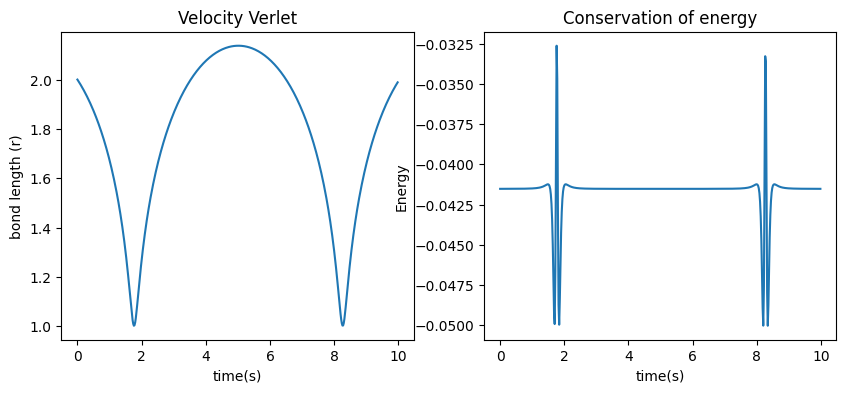

In [8]:
r0 = 2 
v0 = -0.2
h = 0.02
m = 1
end_time = 10

t,r,v = velocity_verlet(r0, v0, h, m, end_time)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(t, r)
axs[0].set_xlabel("time(s)");axs[0].set_ylabel("bond length (r)");axs[0].set_title("Velocity Verlet")

energy = energy_of_system(t, m, v)

axs[1].plot(t, energy);axs[1].set_xlabel("time(s)");axs[1].set_ylabel("Energy");axs[1].set_title("Conservation of energy")

Text(0.5, 1.0, 'Conservation of energy')

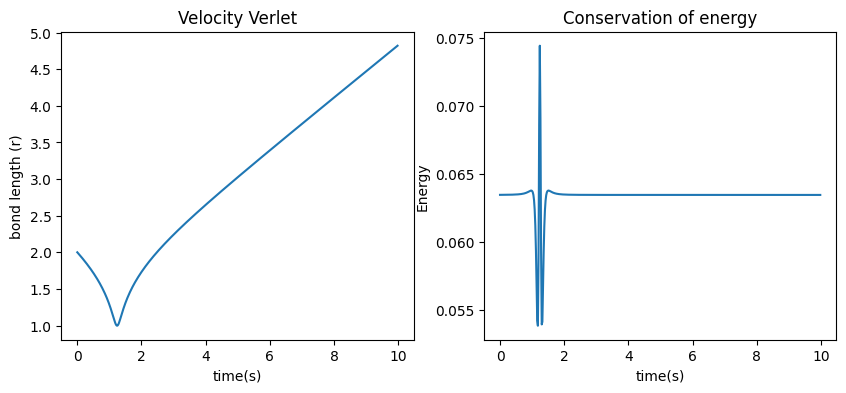

In [9]:
r0 = 2 
v0 = -0.5
h = 0.02
m = 1
end_time = 10

t,r,v = velocity_verlet(r0, v0, h, m, end_time)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(t, r)
axs[0].set_xlabel("time(s)");axs[0].set_ylabel("bond length (r)");axs[0].set_title("Velocity Verlet")

energy = energy_of_system(t, m, v)

axs[1].plot(t, energy);axs[1].set_xlabel("time(s)");axs[1].set_ylabel("Energy");axs[1].set_title("Conservation of energy")

#### d)

In [10]:
r0 = 2 
v0 = -0.5
h = 0.01
m = 1
end_time = 10
rms_energy_error = []
h_list = []
for i in range(20): # 10 rms energies errors will be calculated from different h values.
    h = i*0.01 + 0.01
    t,r,v = velocity_verlet(r0, v0, h, m, end_time)
    energy = energy_of_system(t, m, v)
    for j in range(len(energy)):
        
    rms_energy_error.append(np.sqrt(abs(max(energy))))
    h_list.append(h**2)
    
plt.plot(h_list, rms_energy_error);plt.xlabel("$h^2$");plt.ylabel("$Energy_{rms}$")

IndentationError: expected an indented block after 'for' statement on line 12 (704662765.py, line 14)

#### When  you increase the energy of the system, the bond breaks. This is why we see the bond length increase linearly.
## Part B: Triatomic reaction dynamics with Lennard-Jones potentials
### B1: The Lennard-Jones potential
#### a)

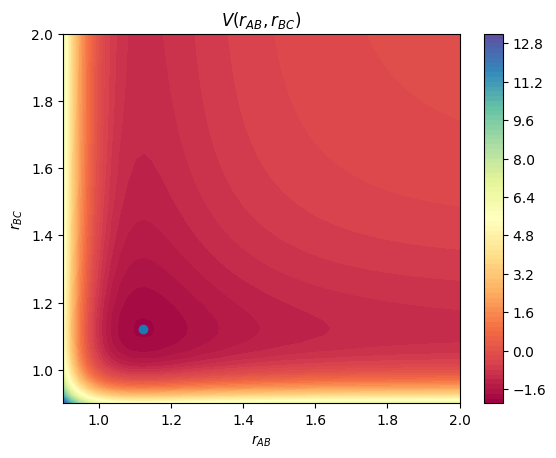

In [30]:
r_AB = np.linspace(0.9,2.0)
r_BC = np.linspace(0.9,2.0)

def V(r, epsilon=1, sigma=1):
    potential = 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
    return potential


rAB, rBC,= np.meshgrid(r_AB, r_BC)
    
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)

plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
r_min = 2**(1/6)
plt.scatter(r_min,r_min)

plt.title('$V(r_{AB}, r_{BC})$')
plt.xlabel('$r_{AB}$')
plt.ylabel('$r_{BC}$')
plt.show()

##### The configuration of the atoms that gives the minimum potential would be when r_AB = r_BC = 2**(1/6).
#### b)

In [ ]:
def bond_lengths(particle_index, pos):
    r = [[0 for _ in range(len(pos))] for _ in range(len(pos))]
    for j in range(len(pos)):
        xij = pos[particle_index][0][-1] - pos[j][0][-1]
        yij = pos[particle_index][1][-1] - pos[j][1][-1]
        zij = pos[particle_index][2][-1] - pos[j][2][-1]
        r[particle_index][j] = np.sqrt(xij**2 + yij**2 + zij**2)
    return r    

def lj_3d(particle_index, pos, r, sigma=1.0, epsilon=1.0):
    #the force vector containing all 3D forces acting on a specified particle
    f = [0, 0, 0]
    for i in range(len(pos)):
        if i != particle_index and r[particle_index][i] != 0:
                f[0] += -(pos[particle_index][0][-1] - pos[i][0][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6))
                f[1] += -(pos[particle_index][1][-1] - pos[i][1][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6))
                f[2] += -(pos[particle_index][2][-1] - pos[i][2][-1])*((24*epsilon*(sigma**6))/(r[particle_index][i]**8))*(1 - 2*((sigma/r[particle_index][i])**6)) 
    return f

def multiple_atoms_Verlet(pos, vel, h, end_time, m):
    t = [0]
    # r = [[0 for _ in range(len(pos))] for _ in range(len(pos))]
    
    while t[-1] < end_time:
        for i in range(len(pos)):
            #Compute all of our r_ij b/c we need them for computing F
            r = bond_lengths(i, pos)
            f = lj_3d(i, pos, r)
            
            # step 1: calculate
            pos[i][0].append(pos[i][0][-1] + (h*vel[i][0][-1]) + (((h**2)*f[0])/(2*m[i])))#x1(k+1)
            pos[i][1].append(pos[i][1][-1] + (h*vel[i][1][-1]) + (((h**2)*f[1])/(2*m[i])))#y1(k+1)
            pos[i][2].append(pos[i][2][-1] + (h*vel[i][2][-1]) + (((h**2)*f[2])/(2*m[i])))#z1(k+1)

        # step 2: evaluate        
        for i in range(len(pos)):
            # Because we have computed new positions for each particle, we must re-compute our new bond lengths.
            r = bond_lengths(i, pos)
            f_new = lj_3d(i, pos, r)
            # step 3: calculate
            vel[i][0].append(vel[i][0][-1] + ((h/(2*m[i])) * (f[0] + f_new[0])))
            vel[i][1].append(vel[i][1][-1] + ((h/(2*m[i])) * (f[1] + f_new[1])))
            vel[i][2].append(vel[i][2][-1] + ((h/(2*m[i])) * (f[2] + f_new[2])))
        t.append(t[-1] + h)
    return t, pos, vel
            
A = [[-3.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
C = [[1.3], [0.0], [0.0]]
pos = [A, B, C]
A_v = [[1.0], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
C_v = [[0.0], [0.0], [0.0]]
vel = [A_v, B_v, C_v]
h = 0.01 # homework step size diverges ?
m = [1, 1, 1]
end_time = 11

t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A_x = np.array(pos[0][0])
B_x = np.array(pos[1][0])
C_x = np.array(pos[2][0])

r_AB_x = np.abs(A_x - B_x)
r_BC_x = np.abs(B_x - C_x)
r_AC_x = np.abs(A_x - C_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.plot(r_AB_x, r_BC_x)
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

##### These starting conditions are preparation for simulating what happens when particle with an intial velocity interacts with a pair of bonded particles in a 1-dimensional plane.

#### c)

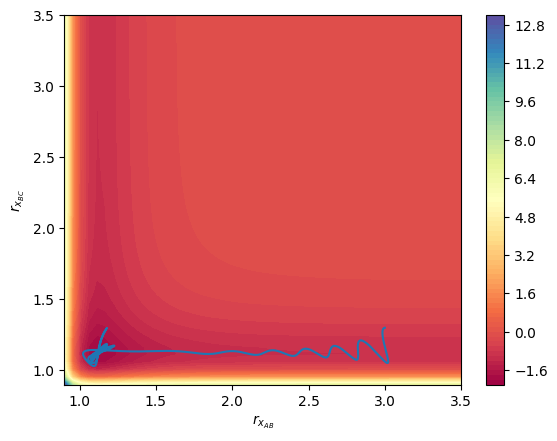

In [31]:
A = [[-3.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
C = [[1.3], [0.0], [0.0]]
pos = [A, B, C]
A_v = [[0.2], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
C_v = [[0.0], [0.0], [0.0]]
vel = [A_v, B_v, C_v]
h = 0.02
m = [1, 1, 1]
end_time = 15

t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A_x = np.array(pos[0][0])
B_x = np.array(pos[1][0])
C_x = np.array(pos[2][0])

r_AB_x = np.abs(A_x - B_x)
r_BC_x = np.abs(B_x - C_x)
r_AC_x = np.abs(A_x - C_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.plot(r_AB_x, r_BC_x)
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

#### d)

In [ ]:
A = [[-3.0], [0.0], [0.0]] 
B = [[0.0], [0.0], [0.0]] #format particle name = [[x], [y], [z]]
C = [[1.3], [0.0], [0.0]]
pos = [A, B, C]
A_v = [[5.0], [0.0], [0.0]]
B_v = [[0.0], [0.0], [0.0]] #format {particle name}_v  = [[v_x], [v_y], [v_z]]
C_v = [[0.0], [0.0], [0.0]]
vel = [A_v, B_v, C_v]
h = 0.01
m = [1, 1, 1]
end_time = 2

t, pos, vel = multiple_atoms_Verlet(pos, vel, h, end_time, m)

A_x = np.array(pos[0][0])
B_x = np.array(pos[1][0])
C_x = np.array(pos[2][0])

r_AB_x = np.abs(A_x - B_x)
r_BC_x = np.abs(B_x - C_x)
r_AC_x = np.abs(A_x - C_x)

r_AB = np.linspace(0.9,3.5)
r_BC = np.linspace(0.9,3.5)
rAB, rBC,= np.meshgrid(r_AB, r_BC)
V_AB_BC = V(rAB) + V(rBC) + V(rAB + rBC)
plt.contourf(rAB, rBC, V_AB_BC, levels=100, cmap='Spectral')
plt.colorbar()
plt.plot(r_AB_x, r_BC_x)
plt.xlabel("$r_{x_{AB}}$");plt.ylabel("$r_{x_{BC}}$");plt.show()

With a time step of h = 0.01, the simulations look better for me. Why is this?